In [270]:
from flickplay.get_connections import get_pymysql_con, get_alchemy_con
from flickplay.mongo import get_mongo_db_obj
from flickplay import query
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from flickplay.utils import make_big

low_end = [
    "63bdcf966e703359486c3852",
    "63b8837b955644d552edfd6c",
    "63bda2fd6e703359486c3850",
    "63bda30c6e703359486c3851"]

high_end = [
    "63b72847955644d552edfd69"]

db = get_mongo_db_obj()
unlocks = pd.DataFrame.from_records(db.unlockedexperiences.find())
unlocks['eid'] = unlocks.experience.apply(lambda x: str(x))

for eid in low_end+high_end:
    print(eid, len(unlocks[unlocks.eid==eid]))
    
    


63bdcf966e703359486c3852 7
63b8837b955644d552edfd6c 7
63bda2fd6e703359486c3850 27
63bda30c6e703359486c3851 5
63b72847955644d552edfd69 8


In [271]:
dr = pd.DataFrame.from_records(db.recordings.find())

In [272]:
exps = set(unlocks[unlocks.eid.isin(low_end+high_end)].experience)
outof = len(dr)
import sys

recordings = { e:[] for e in exps }

for idx, row in dr.iterrows():
    for e in row.experiences:
        if e in exps:
            recordings[e].append(row._id)
            
    if idx%300 == 0:
        sys.stdout.write(f'{idx} out of {outof}\r')
        
for e,n in { e: len(v) for e,v in recordings.items() }.items():
    print(e,n)

63bda2fd6e703359486c3850 10
63b8837b955644d552edfd6c 24
63bdcf966e703359486c3852 0
63bda30c6e703359486c3851 1
63b72847955644d552edfd69 7


In [273]:
users = pd.DataFrame.from_records(db.users.find())

users_of_recordings = {k:[] for k,v in recordings.items()}

for experience_id, recording_ids_list in recordings.items():
    for recording_id in recording_ids_list:
        this_user_id = dr[dr._id==recording_id].user.iloc[0]
        this_user_name = users[users._id==this_user_id].username.iloc[0]
        users_of_recordings[experience_id].append(this_user_name)
        
users_of_recordings





{ObjectId('63bda2fd6e703359486c3850'): ['sahir',
  'deleted_1673951315093_alonachala3015',
  'marcelkuhn_bamert2842',
  'lunch_boxlol',
  'mackenziebanker7902',
  'zoehoren523',
  'sahir',
  'twinjus',
  'twinjus',
  'twinjus'],
 ObjectId('63b8837b955644d552edfd6c'): ['wendy',
  'denise',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy',
  'wendy'],
 ObjectId('63bdcf966e703359486c3852'): [],
 ObjectId('63bda30c6e703359486c3851'): ['loïcblaise143'],
 ObjectId('63b72847955644d552edfd69'): ['wendy',
  'wendy',
  'sahir',
  'known',
  'twinjus',
  'twinjus',
  'wendy']}

In [274]:
import datetime
from datetime import timedelta

recording_dates_ord = { k:[] for k,v in recordings.items() }

for experience_id, recordings_list in recordings.items():
    for recording_id in recordings_list:
        this_recording_date = dr[dr._id==recording_id].created.iloc[0]
        recording_dates_ord[experience_id].append(
            (this_recording_date - datetime.datetime(2022,12,31)).days)
        
        

In [275]:
recording_dates_ord

{ObjectId('63bda2fd6e703359486c3850'): [16,
  16,
  16,
  17,
  18,
  18,
  19,
  23,
  23,
  23],
 ObjectId('63b8837b955644d552edfd6c'): [20,
  23,
  24,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  29,
  29,
  29,
  29,
  29,
  29,
  29,
  29,
  29,
  29,
  29,
  30],
 ObjectId('63bdcf966e703359486c3852'): [],
 ObjectId('63bda30c6e703359486c3851'): [24],
 ObjectId('63b72847955644d552edfd69'): [19, 19, 22, 23, 23, 23, 27]}

In [276]:
import datetime
from datetime import timedelta

recording_dates = { k:[] for k,v in recordings.items() }

for experience_id, recordings_list in recordings.items():
    for recording_id in recordings_list:
        this_recording_date = dr[dr._id==recording_id].created.iloc[0]
        recording_dates[experience_id].append(this_recording_date.date().strftime('%Y-%m-%d'))
        
        

In [277]:
recording_dates

{ObjectId('63bda2fd6e703359486c3850'): ['2023-01-16',
  '2023-01-16',
  '2023-01-16',
  '2023-01-17',
  '2023-01-18',
  '2023-01-18',
  '2023-01-19',
  '2023-01-23',
  '2023-01-23',
  '2023-01-23'],
 ObjectId('63b8837b955644d552edfd6c'): ['2023-01-20',
  '2023-01-23',
  '2023-01-24',
  '2023-01-28',
  '2023-01-28',
  '2023-01-28',
  '2023-01-28',
  '2023-01-28',
  '2023-01-28',
  '2023-01-28',
  '2023-01-28',
  '2023-01-28',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-29',
  '2023-01-30'],
 ObjectId('63bdcf966e703359486c3852'): [],
 ObjectId('63bda30c6e703359486c3851'): ['2023-01-24'],
 ObjectId('63b72847955644d552edfd69'): ['2023-01-19',
  '2023-01-19',
  '2023-01-22',
  '2023-01-23',
  '2023-01-23',
  '2023-01-23',
  '2023-01-27']}

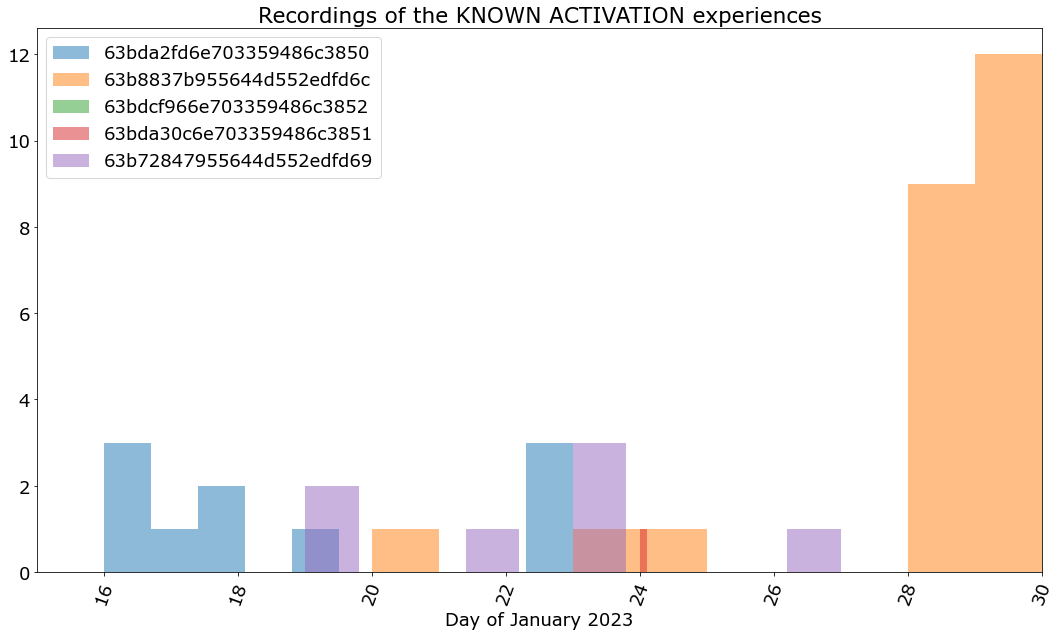

In [278]:
# import datetime
# from datetime import timedelta

# recording_dates = { k:[] for k,v in recordings.items() }

# for experience_id, recordings_list in recordings.items():
#     for recording_id in recordings_list:
#         this_recording_date = dr[dr._id==recording_id].created.iloc[0]
#         recording_dates[experience_id].append(this_recording_date.date().strftime('%Y-%m-%d'))
        
import numpy as np
from collections import OrderedDict
        
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

idx=0
fig,ax=make_big()
# labels = [ (datetime.datetime(2023,1,15)+timedelta(days=i)).date().strftime('%Y-%m-%d') for i in range(15) ]


# ax.set_xticklabels(labels)
ax.set_title('Recordings of the KNOWN ACTIVATION experiences')
plt.xlim(15,30)
for k, v in OrderedDict(recording_dates_ord).items():
    this_color = hex_to_rgb(default_colors[idx])
    tc=this_color
    idx+=1
    this_color_withAlpha = (tc[0]/255,tc[1]/255,tc[2]/255,0.5)
    ax.hist(v, label=str(k),fc=this_color_withAlpha)

    plt.xticks(rotation=70)
    plt.legend()
    plt.xlabel('Day of January 2023')


In [281]:
import pymysql



In [283]:
conp = pymysql.connect(host='34.28.91.153',
                       user='root',
                       port=3306,
                       password='Y*G-PZ*zXjJM5fH.')

OperationalError: (2003, "Can't connect to MySQL server on '34.28.91.153' (timed out)")